<a href="https://www.kaggle.com/code/mohamedsaid28/future-sales?scriptVersionId=134284586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  This data is about shops sales
#  source: Kaggle

#  Purpose: sharing python skills such as :
1. importing data
1. Compining files 
1. Mathematical Operations on columns and getting a new information
1. make a pivot table to extracts some information
1. Describing the data
1. Visualizing the data

# Skill: 1/ importing data**

In [1]:
# 1.1 importing python libiraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 1.2 importing files


item_cat= pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
items= pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
sales= pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
shops= pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')

In [3]:
# 1.3 review data

In [4]:
item_cat.head(1)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0


In [5]:
items.head(1)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40


In [6]:
sales.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0


In [7]:
shops.head(1)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0


# Skill: 2/ Compining Files

In [8]:
# merging the files to get the full required data columns to analyze it

# first merge: [sales, items] and ===> puting the data in a new DataFrame ' sales_1'

sales_1=pd.merge(sales, items, how='inner', on='item_id')
sales_1.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [9]:
# second merge: [sales_1, shops] and ===> puting the data in a new DataFrame ' sales_2'


sales_2=pd.merge(sales_1,shops, how='inner', on='shop_id')
sales_2.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир"""
1,16.05.2013,4,59,2573,249.0,1.0,DEL REY LANA Born To Die,55,"Ярославль ТЦ ""Альтаир"""
2,26.01.2013,0,59,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир"""
3,09.01.2013,0,59,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир"""
4,24.02.2013,1,59,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир"""


# Skill: 3/ Mathematical Operations

In [10]:
#getting 'sales amount' from multibly [item_cnt_day * item_price]
# and add the totoal in a new column inside the DataFrame . called'sales amount '

sales_2['sales_amount']= sales_2['item_cnt_day'] * sales_2['item_price']
sales_2.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,sales_amount
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",999.0
1,16.05.2013,4,59,2573,249.0,1.0,DEL REY LANA Born To Die,55,"Ярославль ТЦ ""Альтаир""",249.0
2,26.01.2013,0,59,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир""",399.0


# Skill: 4/ make a pivot table

In [11]:
# calculate items sold per every shop


sal_shops= sales_2.pivot_table(index='shop_name', values='item_cnt_day', aggfunc='count').reset_index()
sal_shops.head(1)

,shop_name,item_cnt_day
0,"!Якутск Орджоникидзе, 56 фран",9857


# Skill: 5/ Describing the data

In [12]:
sal_shops.describe()

,item_cnt_day
count,60.000000
mean,48930.816667
std,44692.572612
min,306.000000
25%,20503.750000
50%,42037.500000
75%,58211.000000
max,235636.000000


# Skill: 5/ Visualizing the data

<Axes: >

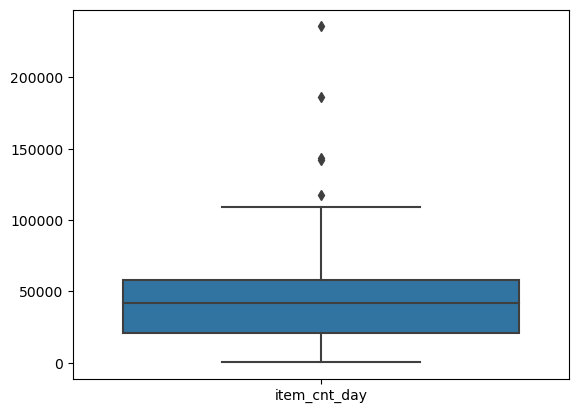

In [13]:
sns.boxplot(sal_shops)

In [14]:
xshops= sal_shops['shop_name'].tolist()
yshops= sal_shops['item_cnt_day'].tolist()

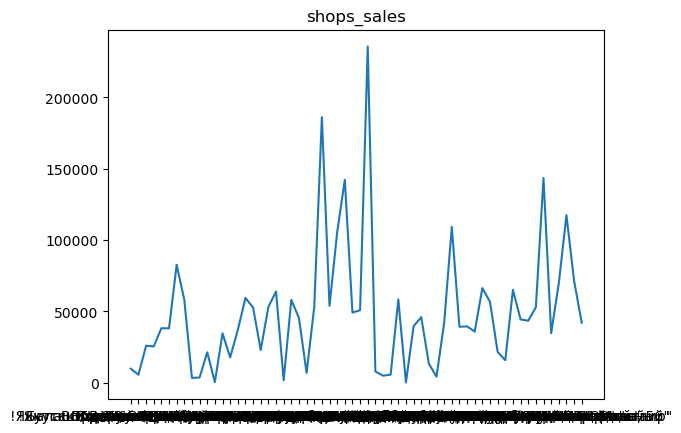

In [15]:
plt.title('shops_sales')
plt.plot(xshops,yshops)